#### cluster the data of link below:
#### data set link: https://www.kaggle.com/datasets/illiamakovoz/most-popular-en-podcasts-with-ratings-description
##### This dataset is the largest publicly available collection of English podcasts on the free internet. It was collected using a specifically developed BFS algorithm. Data were sourced from iTunes, Podcast Index, and Podtail. The goal was to gather a large dataset and create a personalized recommendation system.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data = pd.read_excel('podcasts_en.xlsx' , engine='openpyxl')

In [104]:
data.head()

,podcast_name,podtail_link,itunes_id,podcastindex_id,description,rss_link,language,categories,number_of_podcasts,rating
0,Huberman Lab,https://podtail.com/podcast/huberman-lab/,1545953110,1365758,Huberman Lab discusses neuroscience: how our b...,https://hubermanlab.libsyn.com/rss,en,"Health,Fitness,Science",173.0,4.9
1,Dateline NBC,https://podtail.com/podcast/dateline-nbc/,1464919521,945141,"Current and classic episodes, featuring compel...",https://podcastfeeds.nbcnews.com/dateline-nbc,en,"News,Society,Culture,True Crime",469.0,4.4
2,SmartLess,https://podtail.com/podcast/smartless/,1521578868,150970,"SmartLess with Jason Bateman, Sean Hayes, & Wi...",https://feeds.simplecast.com/pvzhyDQn,en,"Comedy,Education,Society,Culture",184.0,4.7
3,The Daily,https://podtail.com/podcast/the-daily/,1200361736,743229,This is what the news should sound like. The b...,http://rss.art19.com/the-daily,en,"News,Daily",1973.0,4.4
4,Stuff You Should Know,https://podtail.com/podcast/stuff-you-should-k...,278981407,827592,"If you've ever wanted to know about champagne,...",https://feeds.megaphone.fm/stuffyoushouldknow,en-US,"Society,Culture",2218.0,4.5


In [105]:
data.columns

Index(['podcast_name', 'podtail_link', 'itunes_id', 'podcastindex_id',
       'description', 'rss_link', 'language', 'categories',
       'number_of_podcasts', 'rating'],
      dtype='object')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14220 entries, 0 to 14219
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   podcast_name        14220 non-null  object 
 1   podtail_link        14220 non-null  object 
 2   itunes_id           14220 non-null  int64  
 3   podcastindex_id     14220 non-null  int64  
 4   description         14220 non-null  object 
 5   rss_link            14220 non-null  object 
 6   language            14220 non-null  object 
 7   categories          14220 non-null  object 
 8   number_of_podcasts  14219 non-null  float64
 9   rating              14220 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


### OoooPs!
#### one missing data in 'number_of_podcasts' column:

In [107]:
data.isna().sum()

podcast_name          0
podtail_link          0
itunes_id             0
podcastindex_id       0
description           0
rss_link              0
language              0
categories            0
number_of_podcasts    1
rating                0
dtype: int64

In [108]:
data.describe()

,itunes_id,podcastindex_id,number_of_podcasts,rating
count,1.422000e+04,1.422000e+04,14219.000000,14220.00000
mean,1.393499e+09,2.234065e+06,124.127505,3.84706
std,3.343195e+08,2.156048e+06,240.691077,1.89324
min,7.332927e+07,2.590000e+02,0.000000,0.00000
25%,1.372610e+09,5.479180e+05,19.000000,4.20000
50%,1.505474e+09,1.101269e+06,58.000000,4.80000
75%,1.577678e+09,4.114988e+06,142.000000,5.00000
max,1.712827e+09,6.657646e+06,10000.000000,5.00000


In [109]:
data.describe(include='all')

,podcast_name,podtail_link,itunes_id,podcastindex_id,description,rss_link,language,categories,number_of_podcasts,rating
count,14220,14220,1.422000e+04,1.422000e+04,14220,14220,14220,14220,14219.000000,14220.00000
unique,14179,14204,NaN,NaN,14183,14199,19,5605,NaN,NaN
top,Imperial College Podcast,https://podtail.com/podcast/huberman-lab/,NaN,NaN,AMERICA'S RETURN TO SPACE - News and Informat...,https://aboutspacetoday.libsyn.com/feed,en,Education,NaN,NaN
freq,4,2,NaN,NaN,4,4,9394,130,NaN,NaN
mean,NaN,NaN,1.393499e+09,2.234065e+06,NaN,NaN,NaN,NaN,124.127505,3.84706
std,NaN,NaN,3.343195e+08,2.156048e+06,NaN,NaN,NaN,NaN,240.691077,1.89324
min,NaN,NaN,7.332927e+07,2.590000e+02,NaN,NaN,NaN,NaN,0.000000,0.00000
25%,NaN,NaN,1.372610e+09,5.479180e+05,NaN,NaN,NaN,NaN,19.000000,4.20000
50%,NaN,NaN,1.505474e+09,1.101269e+06,NaN,NaN,NaN,NaN,58.000000,4.80000
75%,NaN,NaN,1.577678e+09,4.114988e+06,NaN,NaN,NaN,NaN,142.000000,5.00000


## let's get to know the data:

In [110]:
data['language'].unique()

array(['en', 'en-US', 'en-us', 'en-ca', 'en-zw', 'en-gb', 'en-en',
       'en-AU', 'en-au', 'en-IE', 'en-GB', 'en-CA', 'en-ie', 'EN',
       'en-UK', 'en-uk', 'en-AUS', 'en-EN', 'en-PI'], dtype=object)

In [111]:
data['categories']

0                                   Health,Fitness,Science
1                          News,Society,Culture,True Crime
2                         Comedy,Education,Society,Culture
3                                               News,Daily
4                                          Society,Culture
                               ...                        
14215    News,Commentary,Society,Culture,Personal,Journals
14216                   Society,Culture,News,Politics,Arts
14217                             News,Commentary,Politics
14218                               Health,Fitness,Science
14219                      News,Society,Culture,True Crime
Name: categories, Length: 14220, dtype: object

In [112]:
data['categories'].str.split(',')

0                               [Health, Fitness, Science]
1                     [News, Society, Culture, True Crime]
2                    [Comedy, Education, Society, Culture]
3                                            [News, Daily]
4                                       [Society, Culture]
                               ...                        
14215    [News, Commentary, Society, Culture, Personal,...
14216             [Society, Culture, News, Politics, Arts]
14217                         [News, Commentary, Politics]
14218                           [Health, Fitness, Science]
14219                 [News, Society, Culture, True Crime]
Name: categories, Length: 14220, dtype: object

In [113]:
#split the categories
categores = set()
for each_lin in  data['categories'].str.split(','):
    for category in each_lin:
        categores.add(category)
print('There are {} categories in total!'.format(len(categores)))


There are 106 categories in total!


In [114]:
categores

{'After-Shows',
 'Alternative',
 'Animals',
 'Animation',
 'Arts',
 'Astronomy',
 'Automotive',
 'Aviation',
 'Baseball',
 'Basketball',
 'Beauty',
 'Books',
 'Buddhism',
 'Business',
 'Careers',
 'Chemistry',
 'Christianity',
 'Comedy',
 'Commentary',
 'Courses',
 'Crafts',
 'Cricket',
 'Culture',
 'Daily',
 'Design',
 'Documentary',
 'Drama',
 'Earth',
 'Education',
 'Entertainment',
 'Entrepreneurship',
 'Family',
 'Fantasy',
 'Fashion',
 'Fiction',
 'Film',
 'Fitness',
 'Food',
 'Football',
 'Games',
 'Garden',
 'Golf',
 'Government',
 'Health',
 'Hinduism',
 'History',
 'Hobbies',
 'Hockey',
 'Home',
 'How To',
 'Improv',
 'Interviews',
 'Investing',
 'Islam',
 'Journals',
 'Judaism',
 'Kids',
 'Language',
 'Learning',
 'Leisure',
 'Life',
 'Management',
 'Manga',
 'Marketing',
 'Mathematics',
 'Medicine',
 'Mental',
 'Music',
 'Natural',
 'Nature',
 'News',
 'Non-profit',
 'Nutrition',
 'Parenting',
 'Performing',
 'Personal',
 'Pets',
 'Philosophy',
 'Physics',
 'Places',
 'Poli

#### let's create a one-hot matrix with 106 columns:

In [115]:
category_df = {c:[] for c in categores}
category_df

{'Fashion': [],
 'Technology': [],
 'Food': [],
 'Business': [],
 'Aviation': [],
 'Relationships': [],
 'Learning': [],
 'Video Games': [],
 'Pets': [],
 'Cricket': [],
 'Culture': [],
 'After-Shows': [],
 'Film': [],
 'Leisure': [],
 'Fantasy': [],
 'Music': [],
 'Sports': [],
 'Parenting': [],
 'Arts': [],
 'Interviews': [],
 'Mathematics': [],
 'Sexuality': [],
 'How To': [],
 'True Crime': [],
 'Religion': [],
 'Fiction': [],
 'Automotive': [],
 'Games': [],
 'Non-profit': [],
 'Natural': [],
 'Wrestling': [],
 'Management': [],
 'Careers': [],
 'Self Improvement': [],
 'Politics': [],
 'Language': [],
 'Alternative': [],
 'Nutrition': [],
 'Places': [],
 'Swimming': [],
 'Spirituality': [],
 'Medicine': [],
 'Travel': [],
 'Visual': [],
 'Basketball': [],
 'Chemistry': [],
 'Animals': [],
 'Investing': [],
 'Improv': [],
 'Daily': [],
 'Reviews': [],
 'Baseball': [],
 'Marketing': [],
 'Earth': [],
 'Fitness': [],
 'Running': [],
 'Mental': [],
 'Tv': [],
 'Journals': [],
 'Gover

In [116]:
for each_data in data['categories'].str.split(','):
    for each_key in category_df.keys():
        if each_key in each_data:
            category_df[each_key].append(1)
        else:
            category_df[each_key].append(0)


In [117]:
category_df = pd.DataFrame(category_df)

In [118]:
category_df

,Fashion,Technology,Food,Business,Aviation,Relationships,Learning,Video Games,Pets,Cricket,...,Beauty,Books,Hinduism,Life,Christianity,Crafts,Judaism,Kids,Wilderness,Drama
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
category_df.sum()

Fashion        165
Technology     565
Food           231
Business      2486
Aviation        12
              ... 
Crafts          11
Judaism         49
Kids           770
Wilderness     105
Drama          116
Length: 106, dtype: int64

In [120]:
category_df.sum().sort_values()

Swimming        2
Hinduism        4
Cricket         5
Crafts         11
Aviation       12
             ... 
Health       2409
Business     2486
Education    2971
Culture      4028
Society      4084
Length: 106, dtype: int64

In [121]:
category_df.sum().sort_values().head(20)

Swimming        2
Hinduism        4
Cricket         5
Crafts         11
Aviation       12
Mathematics    13
Rugby          15
Tennis         16
Golf           17
Chemistry      18
Running        30
Physics        35
Fantasy        39
Baseball       41
Islam          42
Astronomy      43
Buddhism       48
Judaism        49
Garden         54
Hockey         54
dtype: int64

In [122]:
category_df.sum().sort_values().tail(25)

Music                637
Personal             671
Interviews           672
Mental               746
Family               746
Entrepreneurship     747
Kids                 770
History              807
Sports              1092
Leisure             1119
Spirituality        1238
Religion            1255
Self Improvement    1277
Film                1332
Tv                  1341
Science             1430
Comedy              1811
Arts                2077
Fitness             2299
News                2367
Health              2409
Business            2486
Education           2971
Culture             4028
Society             4084
dtype: int64

### let's create a data frame of 'description' column:

In [123]:
data['description']

0        Huberman Lab discusses neuroscience: how our b...
1        Current and classic episodes, featuring compel...
2        SmartLess with Jason Bateman, Sean Hayes, & Wi...
3        This is what the news should sound like. The b...
4        If you've ever wanted to know about champagne,...
                               ...                        
14215    The Disability Download is brought to you by p...
14216    Dialogos Radio features weekly, in-depth discu...
14217    Politics at the intersection of extremists, pr...
14218    Huberman Lab discusses neuroscience: how our b...
14219    Current and classic episodes, featuring compel...
Name: description, Length: 14220, dtype: object

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
vector = TfidfVectorizer()
desc_embed = vector.fit_transform(data['description'])
desc_embed = desc_embed.toarray()

In [126]:
desc_embed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
desc_embed.shape

(14220, 38575)

In [128]:
X = np.concatenate([desc_embed, category_df.to_numpy()], axis = 1)

In [129]:
X.shape

(14220, 38681)

# OoooPs!
### there is so many features in X. let's use PCA to reduce the number of features:

In [130]:
from sklearn.decomposition import PCA

In [131]:
pca = PCA(n_components= 2)
X_2d = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.09848831, 0.07806783])

In [132]:
np.sum(pca.explained_variance_ratio_)

0.17655613768733064

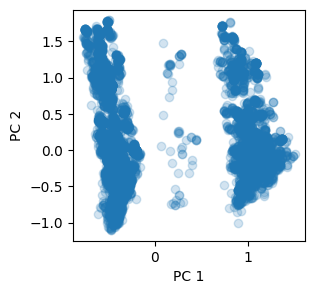

In [133]:
plt.figure(figsize=(3,3))
plt.scatter(X_2d[:,0],X_2d[:,1], alpha= 0.2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [134]:
pca = PCA(n_components= 3)
X_3d = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.09848831 0.07806783 0.05155134]
0.22810747299753464


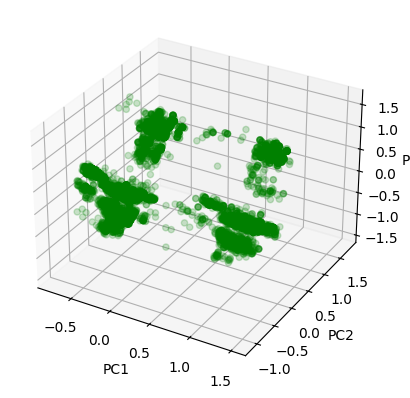

In [135]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.scatter3D(X_3d[:,0],X_3d[:,1],X_3d[:,2],alpha=0.2, color = "green")
plt.show()

### let's find better suitable number of component in PCA with explained_variance_ratio_:

In [136]:
pca20 = PCA(n_components= 20)
X_reduction_20 = pca20.fit_transform(X)
np.sum(pca20.explained_variance_ratio_)

0.5896872765177478

In [137]:
pca100 = PCA(n_components= 100)
X_reduction_100 = pca100.fit_transform(X)
np.sum(pca100.explained_variance_ratio_)

0.7979803100403815

In [138]:
pca200 = PCA(n_components= 200)
X_reduction_200 = pca200.fit_transform(X)
np.sum(pca200.explained_variance_ratio_)

0.8203540055270998

In [139]:
pca300 = PCA(n_components= 300)
X_reduction_300 = pca300.fit_transform(X)
np.sum(pca300.explained_variance_ratio_)

0.8335929541726309

#### So, it seems 200 component is enough.
# Let's go clustring:
## 1.K-means:

In [140]:
from sklearn.cluster import KMeans

In [141]:
cls = KMeans(n_clusters= 2)
y_pred = cls.fit_predict(X_reduction_200)

In [142]:
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [143]:
data.iloc[y_pred==1,:]

,podcast_name,podtail_link,itunes_id,podcastindex_id,description,rss_link,language,categories,number_of_podcasts,rating
0,Huberman Lab,https://podtail.com/podcast/huberman-lab/,1545953110,1365758,Huberman Lab discusses neuroscience: how our b...,https://hubermanlab.libsyn.com/rss,en,"Health,Fitness,Science",173.0,4.9
2,SmartLess,https://podtail.com/podcast/smartless/,1521578868,150970,"SmartLess with Jason Bateman, Sean Hayes, & Wi...",https://feeds.simplecast.com/pvzhyDQn,en,"Comedy,Education,Society,Culture",184.0,4.7
4,Stuff You Should Know,https://podtail.com/podcast/stuff-you-should-k...,278981407,827592,"If you've ever wanted to know about champagne,...",https://feeds.megaphone.fm/stuffyoushouldknow,en-US,"Society,Culture",2218.0,4.5
5,Wait Wait... Don't Tell Me!,https://podtail.com/podcast/npr-programs-wait-...,121493804,55813,NPR's weekly news quiz hosted by Peter Sagal. ...,https://feeds.npr.org/344098539/podcast.xml,en,"Comedy,Leisure,Games",300.0,4.6
7,Dying Rose,https://podtail.com/podcast/dying-rose/,1700801267,6561093,How a small team of reporters from a city best...,https://www.omnycontent.com/d/playlist/2fb3740...,en-US,True Crime,8.0,3.8
...,...,...,...,...,...,...,...,...,...,...
14211,Chinese Explained,https://podtail.com/podcast/chinese-explained/,1500549535,113511,Welcome to Chinese Explained! I am Kate. This ...,https://anchor.fm/s/26c27344/podcast/rss,en,"Education,Language,Learning",27.0,5.0
14212,HIM.,https://podtail.com/podcast/him-1/,1289031818,580821,A Weekly Podcast hosted by four black gay men ...,https://feeds.simplecast.com/MyoMk0LV,en,"Society,Culture,Relationships,Comedy,Leisure",166.0,4.8
14213,The Smellcast,https://podtail.com/podcast/the-smellcast/,500846681,1079273,"Produced by Toppie Smellie, a fifty two year o...",https://smellcast.libsyn.com/rss,en,"Comedy,Improv,Society,Culture,Personal,Journals",100.0,5.0
14214,Social Animals,https://podtail.com/podcast/social-animals/,1552637227,2405203,This show is about the stories that define our...,https://socialanimalspodcast.libsyn.com/rss,en,"Society,Culture,Relationships,Comedy",79.0,4.6


In [144]:
cls.inertia_

50612.209195183925

In [145]:
cls = KMeans(n_clusters= 3)
y_pred = cls.fit_predict(X_reduction_200)
cls.inertia_

43231.78587848383

#### find better numbet of clusters in range(2,51):

In [146]:
inertia =[]
n_cluster = []

for k in range(2,51):
    cls = KMeans(n_clusters= k)
    cls.fit_predict(X_reduction_200)
    inertia.append(cls.inertia_)
    n_cluster.append(k)

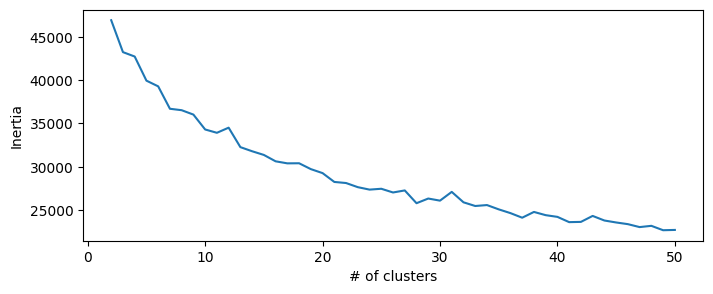

In [147]:
plt.figure(figsize=(8,3))
plt.plot (n_cluster , inertia)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

#### range of k is not enough! try range(2,101):

In [148]:
inertia =[]
n_cluster = []

for k in range(2,101):
    cls = KMeans(n_clusters= k)
    cls.fit_predict(X_reduction_200)
    inertia.append(cls.inertia_)
    n_cluster.append(k)

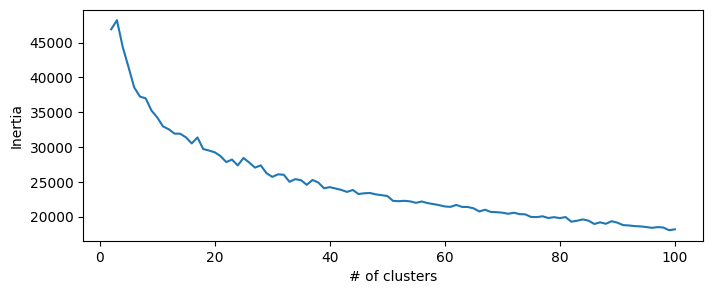

In [149]:
plt.figure(figsize=(8,3))
plt.plot (n_cluster , inertia)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [150]:
inertia =[]
n_cluster = []

for k in range(2,201):
    cls = KMeans(n_clusters= k)
    cls.fit_predict(X_reduction_200)
    inertia.append(cls.inertia_)
    n_cluster.append(k)

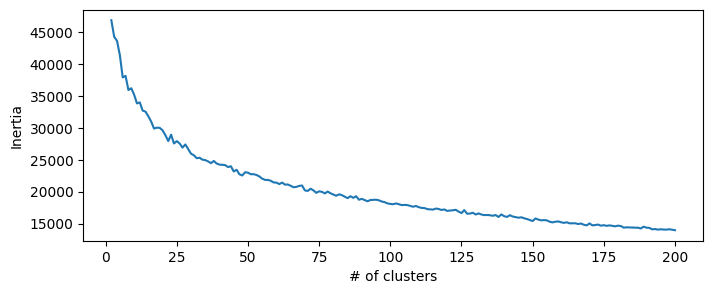

In [151]:
plt.figure(figsize=(8,3))
plt.plot (n_cluster , inertia)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

#### Let's try another metric,Calinski score, beside inertia:

In [152]:
from sklearn.metrics import calinski_harabasz_score

In [153]:
calinski = []
inertia =[]
n_cluster = []

for k in range(2,201):
    cls = KMeans(n_clusters= k)
    y_pred = cls.fit_predict(X_reduction_200)
    calinski.append(calinski_harabasz_score(X=X_reduction_200 , labels= y_pred))
    inertia.append(cls.inertia_)
    n_cluster.append(k)

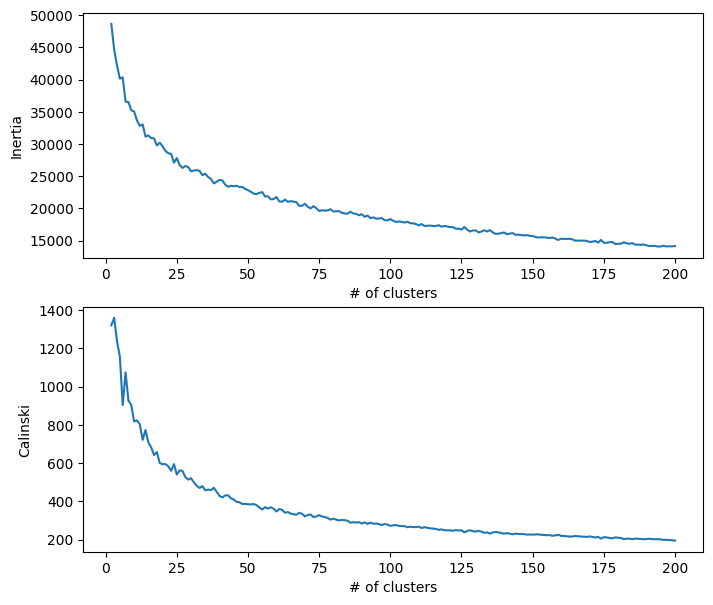

In [154]:
#plot Calinski score and inertia:
plt.figure(figsize=(8,7))
plt.subplot(211)
plt.plot(n_cluster,inertia)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.subplot(212)
plt.plot(n_cluster,calinski)
plt.xlabel('# of clusters')
plt.ylabel('Calinski')
plt.show()

#### look for peak  of Calinski:

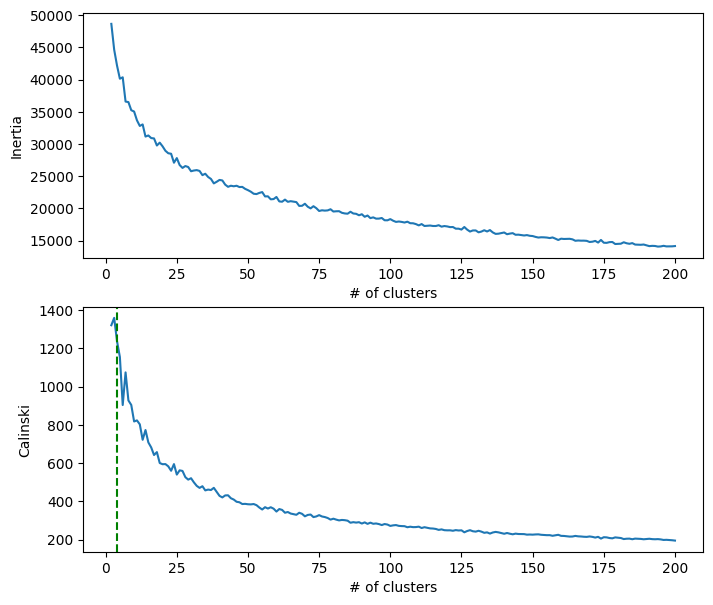

In [155]:
plt.figure(figsize=(8,7))
plt.subplot(211)
plt.plot(n_cluster,inertia)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.subplot(212)
plt.plot(n_cluster,calinski)
plt.axvline(4 , c = 'green', ls ='--')
plt.xlabel('# of clusters')
plt.ylabel('Calinski')
plt.show()

#### the optimal number of cluster in k-means algotithem is : 4
#### let's try another algorithem:

# 2. DBSCAN:

In [159]:
from sklearn.cluster import DBSCAN

In [162]:
cls = DBSCAN(eps= 1 , min_samples=5)
y_pred = cls.fit_predict(X_reduction_200)
y_pred

array([  0,   1,  -1, ..., 227,   0,   1], dtype=int64)

In [163]:
np.unique(y_pred)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

#### unbelievable! 559 clusters!!? let's try to choose better epsilon:

In [164]:
cls = DBSCAN(eps= 2 , min_samples=5)
y_pred = cls.fit_predict(X_reduction_200)
np.unique(y_pred)

array([-1,  0], dtype=int64)

In [165]:
data[y_pred == -1]

,podcast_name,podtail_link,itunes_id,podcastindex_id,description,rss_link,language,categories,number_of_podcasts,rating
11468,The ARC Creative Podcast: Educating + Inspirin...,https://podtail.com/podcast/the-arc-creative-p...,1412858488,1145182,From the creators of ARC interviews + The Expe...,https://arcthisis.libsyn.com/rss,en,"Arts,Visual,Business,Management,Marketing,Soci...",34.0,4.7


In [166]:
data[y_pred == -1]['categories'].values

array(['Arts,Visual,Business,Management,Marketing,Society,Culture,Places'],
      dtype=object)

In [167]:
cls = DBSCAN(eps= 1.45, min_samples=5)
y_pred = cls.fit_predict(X_reduction_200)
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [168]:
# which eps?? Try a range to find better epsilone:

Calinski =[]
epsilon = []

for eps in np.linspace(1,1.5,100):
    cls = DBSCAN(eps= eps, min_samples= 5)
    y_pred =  cls.fit_predict(X_reduction_200)
    if np.unique(y_pred).shape[0] == 2 and -1 in np.unique(y_pred):
        break
    Calinski.append(calinski_harabasz_score(X=X_reduction_200[y_pred != -1] ,
                                            labels= y_pred[y_pred != -1]))
    epsilon.append(eps)

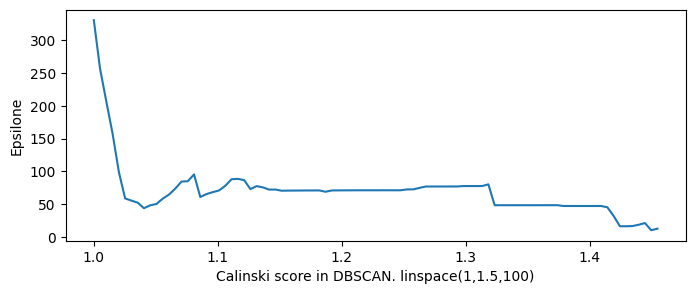

In [170]:
plt.figure(figsize=(8,3))
plt.plot(epsilon, Calinski)
plt.xlabel('Calinski score in DBSCAN. linspace(1,1.5,100)')
plt.ylabel('Epsilone')
plt.show()

In [171]:
# have a closer look:
Calinski =[]
epsilon = []

for eps in np.linspace(1,1.5,21):
    cls = DBSCAN(eps= eps, min_samples= 5)
    y_pred =  cls.fit_predict(X_reduction_200)
    if np.unique(y_pred).shape[0] == 2 and -1 in np.unique(y_pred):
        break
    Calinski.append(calinski_harabasz_score(X=X_reduction_200[y_pred != -1] ,
                                            labels= y_pred[y_pred != -1]))
    epsilon.append(eps)

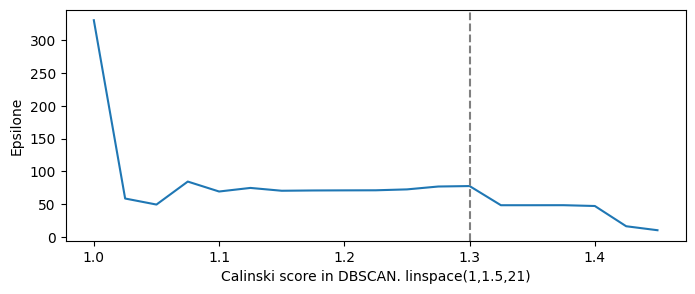

In [172]:
plt.figure(figsize=(8,3))
plt.plot(epsilon , Calinski)
plt.axvline(1.3 , c='gray' , ls= '--')
plt.xlabel('Calinski score in DBSCAN. linspace(1,1.5,21)')
plt.ylabel('Epsilone')
plt.show()

In [173]:
# so eps= 1.3 is the best :
cls = DBSCAN(eps= 1.3, min_samples=5)
y_pred = cls.fit_predict(X_reduction_200)
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype=int64)

In [174]:
print ( 'The number of outliers: ', data[y_pred==-1].shape[0] )
print ( 'percentage of outliers: ', data[y_pred==-1].shape[0] / data.shape[0] * 100)

The number of outliers:  835
percentage of outliers:  5.872011251758087


# 3. Spectral Clustering:

In [78]:
from sklearn.cluster import SpectralClustering

In [79]:
cls = SpectralClustering(n_clusters=28)
y_pred = cls.fit_predict(X_reduction_200)

In [80]:
calinski_harabasz_score(X=X_reduction_200, labels = y_pred)

334.5899327917519

In [82]:
calinski =[]
n_clusters = []
for k in range(10,30,5):
    cls= SpectralClustering(n_clusters= k)
    y_pred = cls.fit_predict(X_reduction_200)
    calinski.append( calinski_harabasz_score(X= X_reduction_200 , labels= y_pred))
    n_clusters.append(k)


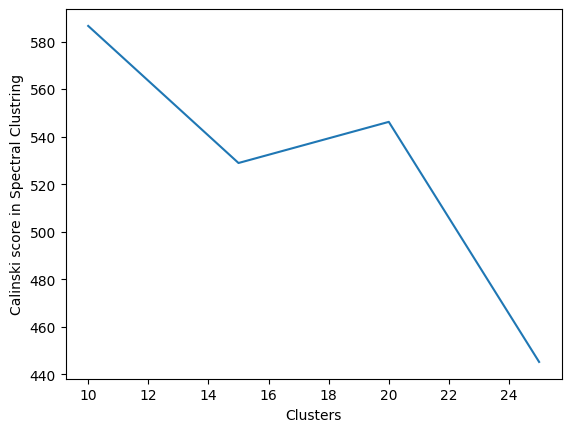

In [84]:
plt.plot(n_clusters , calinski)
plt.ylabel('Calinski score in Spectral Clustring')
plt.xlabel('Clusters')
plt.show()

In [86]:
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [88]:
data.iloc[y_pred ==20]['categories']

45       Science,Social,Education,Self Improvement,Heal...
68       Education,Self Improvement,Health,Fitness,Soci...
222       Education,Self Improvement,Health,Fitness,Mental
229              Education,Self Improvement,Health,Fitness
291      Health,Fitness,Mental,Business,Entrepreneurshi...
                               ...                        
14067     Health,Fitness,Mental,Education,Self Improvement
14073    Health,Fitness,Alternative,Education,Self Impr...
14074     Health,Fitness,Mental,Education,Self Improvement
14075     Education,Self Improvement,Health,Fitness,Mental
14076    Health,Fitness,Sexuality,Education,Self Improv...
Name: categories, Length: 405, dtype: object

In [89]:
data.iloc[y_pred ==20]['categories'].str.split(',')

45       [Science, Social, Education, Self Improvement,...
68       [Education, Self Improvement, Health, Fitness,...
222      [Education, Self Improvement, Health, Fitness,...
229         [Education, Self Improvement, Health, Fitness]
291      [Health, Fitness, Mental, Business, Entreprene...
                               ...                        
14067    [Health, Fitness, Mental, Education, Self Impr...
14073    [Health, Fitness, Alternative, Education, Self...
14074    [Health, Fitness, Mental, Education, Self Impr...
14075    [Education, Self Improvement, Health, Fitness,...
14076    [Health, Fitness, Sexuality, Education, Self I...
Name: categories, Length: 405, dtype: object